In [217]:
# Libraries
import pandas as pd
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import ttest_ind

In [219]:
# RQ: How does different types of vegetation affect the radiation balance of a site? 

In [221]:
###### DATA PREP ######

In [223]:
### VK MobRad short and tall grass ###

In [225]:
# Setting the folder with MObRad data, easiet to use later this way
folder_mobrad = "C:/Users/48512/Desktop/Climate Studies/Period 5 and 6/Field Training Soil-Vegetation-Atmosphere Interactions/VK/MobRAD/Data files"

In [227]:
# Making a df with all of the MobRad data
df_list = list()

for filename in os.listdir(folder_mobrad):
        if filename.endswith(".txt"):
            full_path = os.path.join(folder_mobrad, filename)
            df = pd.read_csv(full_path, skiprows = [1])
            df_list.append(df)

merged_df_mobrad = pd.concat(df_list)

In [319]:
pd.set_option("display.max_rows", None) # Uncomment to see the whole df, but it takes a lot of memory to do it
pd.set_option("display.max_columns", None)
#merged_df_mobrad 

In [231]:
# Adding a Date Time index for easier plotting later
YEAR = 2025

def create_datetime(row):
    doy = int(row['DOY'])
    hhmm = f"{int(row['HHMM']):04d}" 
    hour = int(hhmm[:2])
    minute = int(hhmm[2:])
    second = int(row['SS'])
    
    dt = datetime(YEAR, 1, 1) + timedelta(days=doy - 1, hours=hour, minutes=minute, seconds=second)
    return dt

merged_df_mobrad['datetime'] = merged_df_mobrad.apply(create_datetime, axis=1)

In [232]:
folder_path = r'C:\Users\48512\Desktop\Climate Studies\Period 5 and 6\Field Training Soil-Vegetation-Atmosphere Interactions\df_save'
os.makedirs(folder_path, exist_ok=True)

shortgrass_mobrad.to_csv(os.path.join(folder_path, 'shortgrass_mobrad.csv'), index=False)
tallgrass_mobrad.to_csv(os.path.join(folder_path, 'tallgrass_mobrad.csv'), index=False)

EB_VK_shortgrass.to_csv(os.path.join(folder_path, 'EB_VK_shortgrass.csv'), index=False)
EB_VK_tallgrass.to_csv(os.path.join(folder_path, 'EB_VK_tallgrass.csv'), index=False)

Text(0.5, 1.0, 'Sin tall/short gras')

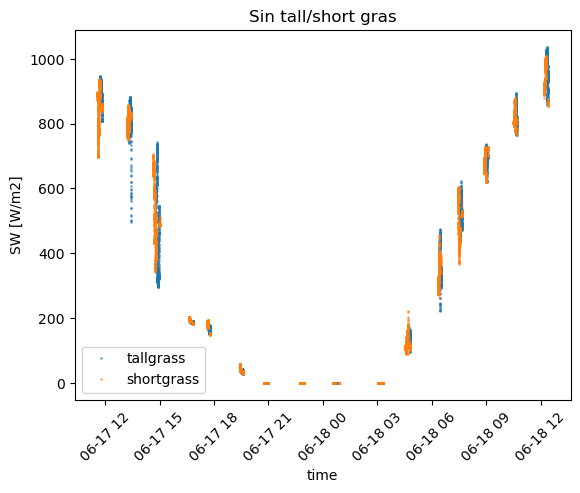

In [355]:
plt.plot(tallgrass_mobrad.index, tallgrass_mobrad['Sin'], label='tallgrass', marker='o', markersize=1, linestyle='None', alpha=0.5)
plt.plot(shortgrass_mobrad.index, shortgrass_mobrad['Sin'], label='shortgrass', marker='o', markersize=1, linestyle='None', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('SW [W/m2]')
plt.xlabel('time')
plt.legend()
plt.title('Sin tall/short gras')

In [321]:
tallgrass_mobrad['Sin']

datetime
2025-06-17 11:42:02     923.450
2025-06-17 11:42:03     926.260
2025-06-17 11:42:04     924.550
2025-06-17 11:42:05     925.770
2025-06-17 11:42:06     923.330
2025-06-17 11:42:07     925.520
2025-06-17 11:42:08     919.170
2025-06-17 11:42:09     911.970
2025-06-17 11:42:10     909.410
2025-06-17 11:42:11     905.740
2025-06-17 11:42:12     902.930
2025-06-17 11:42:13     907.820
2025-06-17 11:42:14     913.800
2025-06-17 11:42:15     914.530
2025-06-17 11:42:16     918.070
2025-06-17 11:42:17     920.640
2025-06-17 11:42:18     914.290
2025-06-17 11:42:19     914.780
2025-06-17 11:42:20     917.340
2025-06-17 11:42:21     924.550
2025-06-17 11:42:22     923.570
2025-06-17 11:42:23     919.910
2025-06-17 11:42:24     918.560
2025-06-17 11:42:25     918.690
2025-06-17 11:42:26     910.380
2025-06-17 11:42:27     906.230
2025-06-17 11:42:28     903.790
2025-06-17 11:42:29     900.250
2025-06-17 11:42:30     898.290
2025-06-17 11:42:31     900.000
2025-06-17 11:42:32     898.420

In [323]:
shortgrass_mobrad['Sin']

datetime
2025-06-17 11:33:40     895.080
2025-06-17 11:33:41     895.080
2025-06-17 11:33:42     895.930
2025-06-17 11:33:43     896.550
2025-06-17 11:33:44     895.810
2025-06-17 11:33:45     895.320
2025-06-17 11:33:46     894.590
2025-06-17 11:33:47     894.470
2025-06-17 11:33:48     894.960
2025-06-17 11:33:49     893.860
2025-06-17 11:33:50     893.370
2025-06-17 11:33:51     892.640
2025-06-17 11:33:52     891.420
2025-06-17 11:33:53     890.440
2025-06-17 11:33:54     890.810
2025-06-17 11:33:55     891.170
2025-06-17 11:33:56     890.680
2025-06-17 11:33:57     890.440
2025-06-17 11:33:58     890.930
2025-06-17 11:33:59     889.710
2025-06-17 11:34:00     888.730
2025-06-17 11:34:01     889.460
2025-06-17 11:34:02     890.560
2025-06-17 11:34:03     889.710
2025-06-17 11:34:04     888.490
2025-06-17 11:34:05     886.290
2025-06-17 11:34:06     885.070
2025-06-17 11:34:07     885.800
2025-06-17 11:34:08     886.530
2025-06-17 11:34:09     885.560
2025-06-17 11:34:10     883.110

In [233]:
# Now I want to extract two separate dfs'. One for each vegetation type (tall vs. short grass)
# If lon ? 5*37'18.8'', then it is tall grass
# 5*37'18.8'' is 5.621889
# This also takes out the NaN location values

threshold_lon = 5.621889

# Filtering rows where lon >= threshold_lon
filtered_df = merged_df_mobrad [merged_df_mobrad ['lon'] >= threshold_lon]
tallgrass_mobrad = filtered_df.copy()

# Filterin rows where lon < threshold_lon
filtered_df = merged_df_mobrad [merged_df_mobrad ['lon'] < threshold_lon]
shortgrass_mobrad = filtered_df.copy()

# Setting datetime index
shortgrass_mobrad.set_index('datetime', inplace=True) 
tallgrass_mobrad.set_index('datetime', inplace=True) # set datetime as index

In [235]:
#plt.hist(merged_df_mobrad["lon"]) # Data check
# Most of the data is in the middle of the field so it looks correct

In [236]:
### VK Eddy Covariance shortgrass ###
### VK Eddy Covariance tallgrass ###

### this I need for Latent Heat flux (LvE) and sensible heat (H)

In [241]:
# Now I want to add to the merged_df the flux profile data
# I will do it based on a shared timestamp (datetime)
# First, I download the flux profile data. 
# The data for shortgrass is in the DATA_FTSVAI/VEENKAMPEN/2025/DATA_RAW/meteo/MainStation/Data-EC
# The data for longgrass is in the DATA_FTSVAI/VEENKAMPEN/2025/DATA_EDITED/Meteo/EC_Fixed_Grass_And_Swamp
# First I do it for VK for 17.06 and 18.06 (days when we were walking around VK with the MObRad)

# # shortgrass
flux_prof_VK_shortgrass_0617 = pd.read_csv(r"C:\Users\48512\Desktop\Climate Studies\Period 5 and 6\Field Training Soil-Vegetation-Atmosphere Interactions\VK\VK_flux20250617(in).csv", skiprows=[1], encoding='latin1',sep=',')
flux_prof_VK_shortgrass_0618 = pd.read_csv(r"C:\Users\48512\Desktop\Climate Studies\Period 5 and 6\Field Training Soil-Vegetation-Atmosphere Interactions\VK\VK_flux20250618(in).csv", skiprows=[1], encoding='latin1', sep=',')

# tallgrass
flux_prof_VK_tallgrass = pd.read_excel(r"C:\Users\48512\Desktop\Climate Studies\Period 5 and 6\Field Training Soil-Vegetation-Atmosphere Interactions\VK\VK_swamp_LvE_H.xlsx")



In [243]:
# Merging the flux_prof dfs from shortgrass into one, changing TIMESTAPT to a date_time format in shortgrass and adding the datetime index for tall grass

# shortgrass
flux_prof_VK_shortgrass = pd.concat([flux_prof_VK_shortgrass_0617, flux_prof_VK_shortgrass_0618], ignore_index=True)
flux_prof_VK_shortgrass['datetime'] = pd.to_datetime(flux_prof_VK_shortgrass['TIMESTAMP'])
flux_prof_VK_shortgrass.set_index('datetime', inplace=True)  # set datetime as index


# If 'date' or 'time' is already parsed as datetime or time, convert them to string first
flux_prof_VK_tallgrass['datetime'] = pd.to_datetime(flux_prof_VK_tallgrass['date'].astype(str) + ' ' + flux_prof_VK_tallgrass['time'].astype(str))

# Set datetime as index
flux_prof_VK_tallgrass.set_index('datetime', inplace=True)

In [245]:
### VK soil heat flux shortgrass ###
### VK soil heat flux tallgrass ###
### this I need for soil heat flux (G) ###
### I don't know how to get the right G data, so for now I will use the placeholders from Leideke ("G_corrected_new")

In [246]:
G = pd.read_csv(r"C:\Users\48512\Desktop\Climate Studies\Period 5 and 6\Field Training Soil-Vegetation-Atmosphere Interactions\VK\G_corrected_new(in).csv")
G['datetime'] = pd.to_datetime(G['TIMESTAMP'])
G.set_index('datetime', inplace=True)  # set datetime as index
G_shortgrass = G
G_tallgrass = G

In [249]:
### VK Eddy Covariance merging with MObRad shortgrass ###

In [250]:
 shortgrass_mobrad

,Index,x,y,lat,lon,DOY,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22
datetime,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:33:40,1,0.000000,0.000000,51.981710,5.621690,168,1133,40,895.08,155.95,368.118463,480.379463,739.13,-112.261,626.869,0.174230,30.239358,0.000000,0.000000,-2.0,61.404196,177.688390,NaN
2025-06-17 11:33:41,2,0.242108,-0.362193,51.981707,5.621693,168,1133,41,895.08,156.01,368.013849,480.153849,739.07,-112.140,626.930,0.174297,30.203730,0.016667,0.435661,-2.0,61.404303,177.696380,NaN
2025-06-17 11:33:42,3,0.484216,-0.724386,51.981703,5.621697,168,1133,42,895.93,156.13,367.902463,479.988463,739.80,-112.086,627.714,0.174266,30.177604,0.033333,0.871321,-2.0,61.404410,177.704370,NaN
2025-06-17 11:33:43,4,0.726324,-1.086579,51.981700,5.621700,168,1133,43,896.55,156.18,367.978770,479.860770,740.37,-111.882,628.488,0.174201,30.157428,0.050000,1.306982,-2.0,61.404516,177.712360,NaN
2025-06-17 11:33:44,5,0.726324,-1.086579,51.981700,5.621700,168,1133,44,895.81,156.13,367.948003,479.800003,739.68,-111.852,627.828,0.174289,30.147826,0.066667,1.306982,-2.0,61.404618,177.720344,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 12:25:26,811,-0.617905,4.430245,51.981703,5.621777,169,1225,26,856.34,178.18,402.408135,492.036135,678.16,-89.628,588.532,0.208072,32.063321,13.500000,553.143230,3.0,60.069741,201.853279,NaN
2025-06-18 12:25:27,812,-1.088758,4.784186,51.981707,5.621770,169,1225,27,856.46,180.54,402.444135,492.788135,675.92,-90.344,585.576,0.210798,32.179872,13.516667,553.732278,3.0,60.068785,201.860682,NaN
2025-06-18 12:25:28,813,-1.559612,5.138127,51.981710,5.621763,169,1225,28,856.34,183.26,402.089078,493.448078,673.08,-91.359,581.721,0.214004,32.282046,13.533333,554.321325,3.0,60.067829,201.868085,NaN


In [251]:
# Averaging the mobrad_shortgrass data every 30 minutes so I can merge it with the EC data
# Resample every 30 minutes, calculating mean for numeric columns
shortgrass_mobrad_30min = shortgrass_mobrad.resample('30T').mean(numeric_only=True).reset_index()
shortgrass_mobrad_30min.set_index('datetime', inplace=True)  # set datetime as index
#shortgrass_mobrad_30min

C:\Users\48512\AppData\Local\Temp\ipykernel_7360\2138200396.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  shortgrass_mobrad_30min = shortgrass_mobrad.resample('30T').mean(numeric_only=True).reset_index()


In [253]:
# Merging the important variables from flux_prof_VK_shortgrass and shortgrass_mobrad_30min into one df to get the energy balance
EB_VK_shortgrass = shortgrass_mobrad_30min.merge(flux_prof_VK_shortgrass, how='inner', left_index=True, right_index=True)
#EB_VK_shortgrass

# Dropping the rows with NaN values (times where we have measourments form the flux tower but nobody was walking with the mobrad) 
#I took the SS collumns as a reference, to where people were walking with mobrad anc ollceting data
EB_VK_shortgrass = EB_VK_shortgrass.dropna(subset=['SS'])
EB_VK_shortgrass

,Index,x,y,lat,lon,DOY_x,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22,TIMESTAMP,DOY_y,daytime,file_records,used_records,Tau,qc_Tau,H,qc_H,LE,qc_LE,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,H_strg,LE_strg,co2_strg,h2o_strg,co2_v-adv,h2o_v-adv,co2_molar_density,co2_mole_fraction,co2_mixing_ratio,co2_time_lag,co2_def_timelag,h2o_molar_density,h2o_mole_fraction,h2o_mixing_ratio,h2o_time_lag,h2o_def_timelag,sonic_temperature,air_temperature,air_pressure,air_density,air_heat_capacity,air_molar_volume,ET,water_vapor_density,e,es,specific_humidity,RH,VPD,Tdew,u_unrot,v_unrot,w_unrot,u_rot,v_rot,w_rot,wind_speed,max_wind_speed,wind_dir,yaw,pitch,roll,u*,TKE,L,(z-d)/L,bowen_ratio,T*,model,x_peak,x_offset,x_10%,x_30%,x_50%,x_70%,x_90%,un_Tau,Tau_scf,un_H,H_scf,un_LE,LE_scf,un_co2_flux,co2_scf,un_h2o_flux,h2o_scf,spikes_hf,amplitude_resolution_hf,drop_out_hf,absolute_limits_hf,skewness_kurtosis_hf,skewness_kurtosis_sf,discontinuities_hf,discontinuities_sf,timelag_hf,timelag_sf,attack_angle_hf,non_steady_wind_hf,u_spikes,v_spikes,w_spikes,ts_spikes,co2_spikes,h2o_spikes,chopper_LI-7500,detector_LI-7500,pll_LI-7500,sync_LI-7500,mean_value_AGC_LI-7500,u_var,v_var,w_var,ts_var,co2_var,h2o_var,w/ts_cov,w/co2_cov,w/h2o_cov
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:30:00,304.737523,-39.758223,-9.255327,51.981640,5.621107,168.0,1138.232902,29.763401,842.097689,146.180148,365.535223,478.933245,695.917542,-113.398022,582.519519,0.173910,30.008130,5.062292,154.541944,-1.293530,61.409287,180.113025,NaN,2025-06-17 11:30:00,168.4790,1,36000,35998,-0.059293,1,105.263000,0,288.69900,0.0,-9.819090,0.0,6.552260,0.0,1.183940,0.566578,-0.098863,0.012859,-2.145650e-10,-9.531270e-12,16.2595,397.710,404.862,0.1,1,722.270,17.6668,17.9845,0.1,1,298.028,296.365,101300.0,1.18293,1015.28,0.024460,0.424587,0.013015,1780.08,2836.17,0.011003,62.7635,1056.0900,288.831,1.451400,-2.243950,-0.104285,2.674460,-1.082080e-13,-1.319630e-14,2.674460,7.151810,253.127,302.8950,-2.23469,NaN,0.223884,1.366470,-9.39961,-0.357781,0.364611,-0.391478,0,43.5588,-6.61022,14.9523,37.2334,56.7833,79.6394,119.314,-0.058330,1.01652,119.824000,1.01775,249.14000,1.10064,-15.644800,1.10064,5.654450,1.10064,800000099,800000099,800000099,800000099,800000099,800000099,899999999,899999999,89999,89999,89,89,12,5,2,12,19,22,0,0,0,0,56,1.245340,1.343780,0.143821,0.402884,0.011466,1483.2200,0.099769,-0.015645,5.654450
2025-06-17 13:00:00,255.296907,-53.049007,-12.172498,51.981608,5.620955,168.0,1314.777320,28.657732,808.077979,160.982227,368.598827,481.719019,647.095753,-113.120192,533.975561,0.199602,30.448546,4.238282,141.822567,-4.750515,55.948633,222.171667,NaN,2025-06-17 13:00:00,168.5415,1,36000,35998,-0.043897,1,120.450000,0,313.09100,0.0,-8.469500,0.0,7.112250,0.0,0.793672,0.678197,-0.043253,0.015406,-1.902210e-10,-8.572850e-12,16.1844,397.139,404.376,0.1,1,729.398,17.8982,18.2244,0.1,1,298.981,297.291,101300.0,1.17914,1015.43,0.024538,0.460874,0.013144,1803.26,2998.69,0.011147,60.1350,1195.4300,289.033,1.766360,-2.158750,-0.092601,2.790850,5.100640e-14,-1.175330e-14,2.790850,7.495230,244.959,309.2910,-1.90144,NaN,0.192946,1.551970,-5.25827,-0.639565,0.384713,-0.521380,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.043203,1.01608,136.210000,1.01761,269.32900,1.10145,-15.211800,1.10145,6.118130,1.10145,800000099,800000099,800000099,800000099,800000099,800000099,899999999,899999999,89999,89999,89,89,0,3,1,11,14,12,0,0,0,0,56,1.359750,1.594290,0.149887,0.443982,0.009770,1461.5900,0.113761,-0.015212,6.118130
2025-06-17 14:30:00,330.805825,-45.791497,-8.552650,51.981621,5.621063,168.0,1442.757282,29.368932,523.101117,118.148092,378.126058,467.156927,404.953024,-89.030869,315.922155,0.223538,28.124497,5.496764,149.051804,-4.368932,44.779161,248.853885,NaN,2025-06-17 14:30:00,168.6040,1,36000,35998,-0.063216,0,69.712700,0,246.66300,0.0,-8.670

In [256]:
# Adding soil heat flux to EB_VK_shortgrass
EB_VK_shortgrass = EB_VK_shortgrass.merge(G_shortgrass, how="inner", left_index=True, right_index=True)

In [257]:
### VK Eddy Covariance merging with MObRad tallgrass ###

In [258]:
# Averaging the mobrad_shortgrass data every 30 minutes so I can merge it with the EC data
# Resample every 30 minutes, calculating mean for numeric columns
tallgrass_mobrad_30min = tallgrass_mobrad.resample('30T').mean(numeric_only=True).reset_index()
tallgrass_mobrad_30min.set_index('datetime', inplace=True)  # set datetime as index
tallgrass_mobrad_30min

C:\Users\48512\AppData\Local\Temp\ipykernel_7360\580688743.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  tallgrass_mobrad_30min = tallgrass_mobrad.resample('30T').mean(numeric_only=True).reset_index()


,Index,x,y,lat,lon,DOY,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22
datetime,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:30:00,736.5,53.973837,34.397293,51.982001,5.622493,168.0,1145.440171,29.089744,886.893825,119.138372,365.248680,486.310109,767.755453,-121.061429,646.694024,0.134139,31.167388,12.258333,397.996202,0.061538,61.380236,183.563204,NaN
2025-06-17 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-17 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-17 13:00:00,684.5,52.690224,32.644538,51.981976,5.622517,168.0,1321.910798,29.852113,802.251268,120.512946,373.820356,488.809260,681.738322,-114.988904,566.749417,0.149652,31.557423,11.391667,397.991002,-3.779343,55.192088,224.751616,NaN
2025-06-17 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-17 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-17 14:30:00,946.0,54.055848,34.173765,51.981973,5.622538,168.0,1453.008658,29.480519,470.013463,79.437453,381.090707,468.371494,390.576010,-87.280787,303.295223,0.167128,28.319679,15.750000,399.052281,-5.663781,43.295436,251.395610,NaN
2025-06-17 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-17 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
# Merging the important variables from flux_prof_VK_shortgrass and shortgrass_mobrad_30min into one df to get the energy balance
EB_VK_tallgrass = tallgrass_mobrad_30min.merge(flux_prof_VK_tallgrass, how='inner', left_index=True, right_index=True)
EB_VK_tallgrass

# Dropping the rows with NaN values (times where we have measourments form the flux tower but nobody was walking with the mobrad) 
#I took the SS collumns as a reference, to where people were walking with mobrad anc ollceting data
EB_VK_tallgrass = EB_VK_tallgrass.dropna(subset=['SS'])
EB_VK_tallgrass

,Index,x,y,lat,lon,DOY,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22,date,time,H,LE
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:30:00,736.5,53.973837,34.397293,51.982001,5.622493,168.0,1145.440171,29.089744,886.893825,119.138372,365.248680,486.310109,767.755453,-121.061429,646.694024,0.134139,31.167388,12.258333,397.996202,0.061538,61.380236,183.563204,NaN,2025-06-17,11:30:00,107.078000,379.36100
2025-06-17 13:00:00,684.5,52.690224,32.644538,51.981976,5.622517,168.0,1321.910798,29.852113,802.251268,120.512946,373.820356,488.809260,681.738322,-114.988904,566.749417,0.149652,31.557423,11.391667,397.991002,-3.779343,55.192088,224.751616,NaN,2025-06-17,13:00:00,99.939600,353.27600
2025-06-17 14:30:00,946.0,54.055848,34.173765,51.981973,5.622538,168.0,1453.008658,29.480519,470.013463,79.437453,381.090707,468.371494,390.576010,-87.280787,303.295223,0.167128,28.319679,15.750000,399.052281,-5.663781,43.295436,251.395610,NaN,2025-06-17,14:30:00,60.577200,304.04000
2025-06-17 16:30:00,623.0,47.017171,40.135099,51.981995,5.622522,168.0,1646.561644,29.301370,187.427886,31.626115,373.356516,439.350490,155.801771,-65.993974,89.807797,0.168744,23.541593,10.366667,401.916074,-0.829746,26.057683,275.333157,NaN,2025-06-17,16:30:00,7.402000,166.99700
2025-06-17 17:30:00,466.0,53.581015,35.379276,51.982017,5.622498,168.0,1743.344214,28.347181,164.786588,29.990341,365.520111,439.580791,134.796246,-74.060680,60.735566,0.182527,23.580870,7.750000,380.946136,0.388724,17.499616,285.892804,NaN,2025-06-17,17:30:00,-6.852320,115.72200
2025-06-17 19:00:00,341.5,21.315959,5.102861,51.981706,5.621996,168.0,1929.000000,43.500000,34.762281,9.647759,356.506315,414.941259,25.114522,-58.434944,-33.320422,0.278160,19.332523,5.675000,257.685050,-3.156250,3.061330,305.621907,NaN,2025-06-17,19:00:00,-16.445600,35.69050
2025-06-17 19:30:00,519.5,56.138478,40.836296,51.982015,5.622521,168.0,1932.222222,28.166667,34.739769,7.550187,355.207533,417.172246,27.189581,-61.964714,-34.775132,0.223005,19.724531,8.641667,396.893220,-3.216049,2.711080,306.194388,NaN,2025-06-17,19:30:00,-10.643300,23.58340
2025-06-17 20:30:00,500.0,56.577157,38.289873,51.981992,5.622526,168.0,2053.668464,28.892183,0.000000,0.000000,344.161099,394.332179,0.000000,-50.171080,-50.171080,NaN,15.629355,8.316667,390.875240,5.655526,-6.490476,322.609410,NaN,2025-06-17,20:30:00,-1.512110,1.45917
2025-06-17 22:30:00,483.5,55.193718,30.956268,51.981927,5.622536,168.0,2253.048128,29.612299,0.000000,0.000000,334.299603,381.836721,0.000000,-47.537117,-47.537117,NaN,13.314396,8.041667,393.095914,4.293583,-13.972027,349.357376,NaN,2025-06-17,22:30:00,-3.222130,0.26990


In [261]:
# Adding soil heat flux to EB_VK_tallgrass
EB_VK_tallgrass = EB_VK_tallgrass.merge(G_tallgrass, how="inner", left_index=True, right_index=True)

In [262]:
###### END DATA PREP ######

In [263]:
###### RADIATION BALANCE ######

In [61]:
### VK short and tall grass ###

In [307]:
# Now I want to see if there are differences between the tall and short grass in the EB and Rb
columns_of_interest = ['Sin', 'Sout', 'Sn', 'Lin', 'Lout', 'Ln', 'Rn', 'albedo']

# tall grass summary statistics
summary_stats_tall = tallgrass_mobrad[columns_of_interest].describe()
print(summary_stats_tall)

               Sin         Sout           Sn          Lin         Lout  \
count  7158.000000  7158.000000  7158.000000  7158.000000  7158.000000   
mean    362.316246    56.048349   306.267897   354.914958   432.534724   
std     347.100291    50.650981   297.925931    24.139554    44.768967   
min       0.000000     0.000000     0.000000   313.657914   354.910760   
25%       0.000000     0.000000     0.000000   333.418633   390.555962   
50%     188.990000    35.931000   158.127000   359.144515   439.345484   
75%     707.575000   107.345000   600.747500   373.476563   473.876566   
max    1037.200000   182.170000   898.790000   403.540933   516.290015   

                Ln           Rn       albedo  
count  7158.000000  7158.000000  5182.000000  
mean    -77.619766   228.648131     0.169650  
std      24.242321   275.451814     0.043428  
min    -143.167000   -57.470100     0.088856  
25%     -96.728750   -43.720000     0.142003  
50%     -74.897455    91.756105     0.158885  
75% 

In [67]:
# Short grass sumarry statistics
summary_stats_short = shortgrass_mobrad[columns_of_interest].describe()
print(summary_stats_short)

               Sin         Sout           Sn          Lin         Lout  \
count  6677.000000  6677.000000  6677.000000  6677.000000  6677.000000   
mean    393.409004    78.559005   314.850000   355.329318   431.282338   
std     347.373718    66.560419   282.088866    21.392760    45.213424   
min       0.000000     0.000000     0.000000   314.560443   351.041072   
25%      35.289000     7.794000    24.750000   337.547217   385.742868   
50%     339.890000    75.650000   258.866000   363.842714   436.475774   
75%     764.500000   146.490000   610.170000   370.753122   474.127957   
max    1008.800000   208.140000   831.930000   402.444135   498.083495   

                Ln           Rn       albedo  
count  6677.000000  6677.000000  5054.000000  
mean    -75.953020   238.896980     0.210187  
std      27.228886   256.461551     0.034299  
min    -127.547000   -54.139000     0.142216  
25%    -100.023000   -29.844800     0.187175  
50%     -79.040800   179.101500     0.205835  
75% 

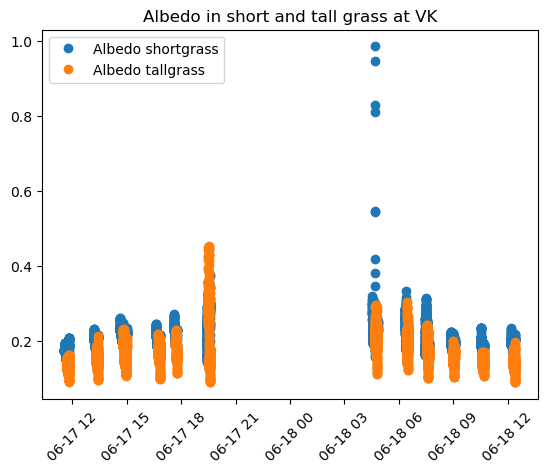

In [69]:
# Quick plot to see the differences in albedo in the two sub-domains

shortgrass_albedo = shortgrass_mobrad['Sout']/shortgrass_mobrad['Sin']
plt.plot(shortgrass_mobrad.index, shortgrass_albedo, label = "Albedo shortgrass", marker='o', linestyle='None')

tallgrass_albedo = tallgrass_mobrad['Sout']/tallgrass_mobrad['Sin']
plt.plot(tallgrass_mobrad.index, tallgrass_albedo, label = "Albedo tallgrass", marker='o', linestyle='None')
plt.xticks(rotation=45)
plt.title("Albedo in short and tall grass at VK")
plt.legend()

In [71]:
albedo_tall_diff = tallgrass_albedo - tallgrass_mobrad['albedo']
albedo_tall_diff.sum()

1.068323873809618e-09

In [73]:
shortgrass_mobrad['albedo']

datetime
2025-06-17 11:33:40    0.174230
2025-06-17 11:33:41    0.174297
2025-06-17 11:33:42    0.174266
2025-06-17 11:33:43    0.174201
2025-06-17 11:33:44    0.174289
                         ...   
2025-06-18 12:25:26    0.208072
2025-06-18 12:25:27    0.210798
2025-06-18 12:25:28    0.214004
2025-06-18 12:25:29    0.216435
2025-06-18 12:25:30    0.217447
Name: albedo, Length: 6677, dtype: float64

In [75]:
# Checking if there are significant differences between variabled in tall and short grass

# Settings
variable = 'Ln'
# End settings

stat, p = ttest_ind(shortgrass_mobrad[f'{variable}'], tallgrass_mobrad[f'{variable}'], equal_var=False)
print(f"T-test {variable}: stat={stat:.2f}, p={p:.6f}")


T-test Ln: stat=3.79, p=0.000150


In [77]:
# Settings specific to albedo (a lot of NaNs)
# Remove NaN values from each group's albedo data
albedo_short_clean = shortgrass_mobrad['albedo'].dropna()
albedo_tall_clean = tallgrass_mobrad['albedo'].dropna()

# End settings

stat, p = ttest_ind(albedo_short_clean, albedo_tall_clean, equal_var=False)
print(f"T-test {variable}: stat={stat:.2f}, p={p:.6f}")

T-test Ln: stat=52.48, p=0.000000


In [79]:
shortgrass_mobrad

,Index,x,y,lat,lon,DOY,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22
datetime,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:33:40,1,0.000000,0.000000,51.981710,5.621690,168,1133,40,895.08,155.95,368.118463,480.379463,739.13,-112.261,626.869,0.174230,30.239358,0.000000,0.000000,-2.0,61.404196,177.688390,NaN
2025-06-17 11:33:41,2,0.242108,-0.362193,51.981707,5.621693,168,1133,41,895.08,156.01,368.013849,480.153849,739.07,-112.140,626.930,0.174297,30.203730,0.016667,0.435661,-2.0,61.404303,177.696380,NaN
2025-06-17 11:33:42,3,0.484216,-0.724386,51.981703,5.621697,168,1133,42,895.93,156.13,367.902463,479.988463,739.80,-112.086,627.714,0.174266,30.177604,0.033333,0.871321,-2.0,61.404410,177.704370,NaN
2025-06-17 11:33:43,4,0.726324,-1.086579,51.981700,5.621700,168,1133,43,896.55,156.18,367.978770,479.860770,740.37,-111.882,628.488,0.174201,30.157428,0.050000,1.306982,-2.0,61.404516,177.712360,NaN
2025-06-17 11:33:44,5,0.726324,-1.086579,51.981700,5.621700,168,1133,44,895.81,156.13,367.948003,479.800003,739.68,-111.852,627.828,0.174289,30.147826,0.066667,1.306982,-2.0,61.404618,177.720344,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 12:25:26,811,-0.617905,4.430245,51.981703,5.621777,169,1225,26,856.34,178.18,402.408135,492.036135,678.16,-89.628,588.532,0.208072,32.063321,13.500000,553.143230,3.0,60.069741,201.853279,NaN
2025-06-18 12:25:27,812,-1.088758,4.784186,51.981707,5.621770,169,1225,27,856.46,180.54,402.444135,492.788135,675.92,-90.344,585.576,0.210798,32.179872,13.516667,553.732278,3.0,60.068785,201.860682,NaN
2025-06-18 12:25:28,813,-1.559612,5.138127,51.981710,5.621763,169,1225,28,856.34,183.26,402.089078,493.448078,673.08,-91.359,581.721,0.214004,32.282046,13.533333,554.321325,3.0,60.067829,201.868085,NaN


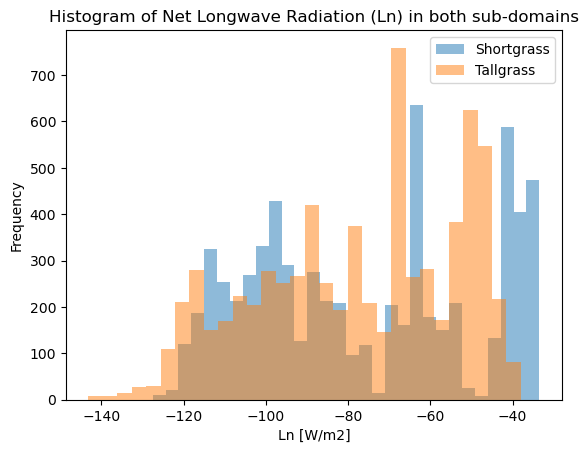

In [87]:
plt.hist(shortgrass_mobrad['Ln'], alpha=0.5, label="Shortgrass", bins=30)
plt.title('Longwave incoming shortgrass')

plt.hist(tallgrass_mobrad['Ln'], alpha=0.5, label="Tallgrass", bins=30)
plt.title('Histogram of Net Longwave Radiation (Ln) in both sub-domains')
plt.xlabel('Ln [W/m2]')
plt.ylabel('Frequency')
plt.legend()

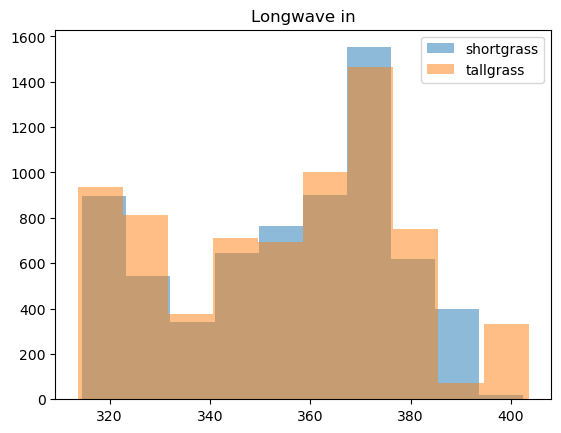

In [89]:
plt.hist(shortgrass_mobrad['Lin'], alpha=0.5, label="shortgrass")
plt.title('Longwave incoming shortgrass')

plt.hist(tallgrass_mobrad['Lin'], alpha=0.5, label="tallgrass")
plt.title('Longwave in')
plt.legend()

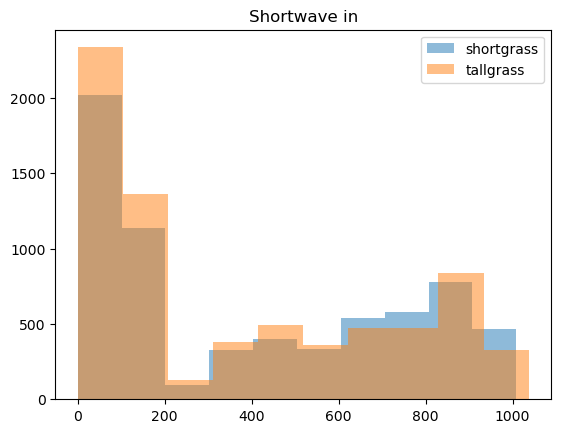

In [305]:
plt.hist(shortgrass_mobrad['Sin'], alpha=0.5, label="shortgrass")
plt.title('Shortwave incoming shortgrass')

plt.hist(tallgrass_mobrad['Sin'], alpha=0.5, label="tallgrass")
plt.title('Shortwave in')
plt.legend()

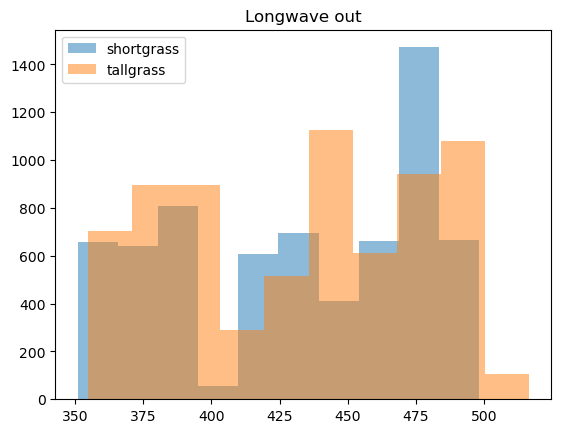

In [91]:
plt.hist(shortgrass_mobrad['Lout'], alpha=0.5, label="shortgrass")
plt.title('Longwave incoming shortgrass')

plt.hist(tallgrass_mobrad['Lout'], alpha=0.5, label="tallgrass")
plt.title('Longwave out')
plt.legend()

Text(0, 0.5, '')

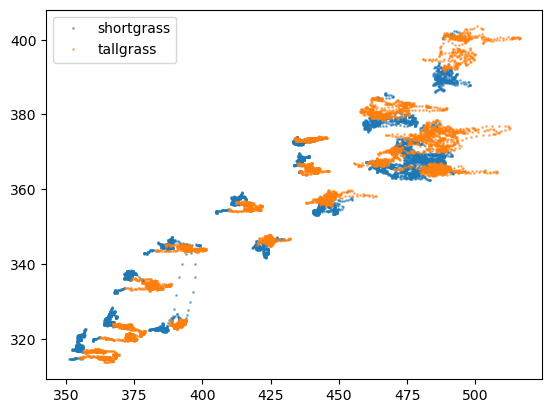

In [105]:
plt.plot(shortgrass_mobrad['Lout'], shortgrass_mobrad['Lin'], marker = "o", label="shortgrass", markersize=1, alpha=0.5, linestyle ='None')
plt.plot(tallgrass_mobrad['Lout'], tallgrass_mobrad['Lin'], marker = "o", label="tallgrass", markersize=1, alpha=0.5, linestyle = 'None')
plt.legend()
plt.xlabel('')
plt.ylabel('')

In [107]:
# Notes for later. I assume p <= 0.05 for significance
# Sin stat=5.26, p=0.000, different
# Sout stat=22.27, p=0.000, different
# Sn stat=1.74, p=0.082, not different
# Lin, stat=1.07, p=0.285, not different
# Lout  stat=-1.64, p=0.102, not different
# Ln, stat=3.79, p=0.000, different
# Rn stat=2.27, p=0.023, different
# albedo p=0.000, different


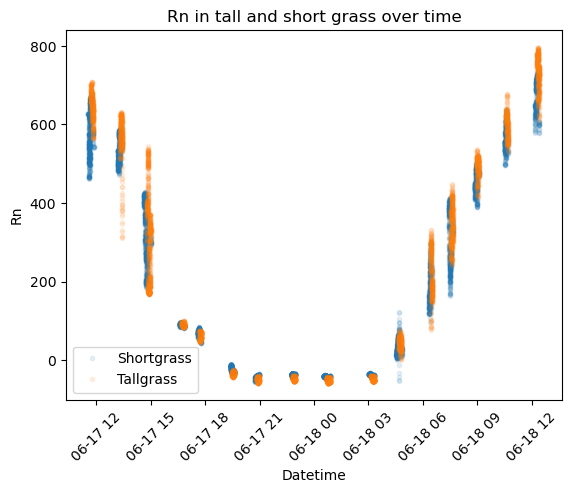

In [109]:
# Simple plotting to compare one variable of the tall and short grass df over time

# Plotting settings
variable = 'Rn'
# End plotting settings

plt.plot(shortgrass_mobrad.index, shortgrass_mobrad[variable], linestyle='None', alpha=0.1, marker='o', markersize=3, label='Shortgrass')
plt.plot(tallgrass_mobrad.index, tallgrass_mobrad[variable], linestyle='None', alpha=0.1, marker='o', markersize=3, label='Tallgrass')


plt.legend()
plt.xlabel('Datetime')
plt.ylabel(variable)
plt.title(f'{variable} in tall and short grass over time')
plt.xticks(rotation=45) 
plt.show()

In [121]:
pos

,Ln_short,Ln_tall,Ln_diff
datetime,,,
2025-06-17 11:34:05,-114.517,-114.390,0.127
2025-06-17 11:34:06,-114.436,-114.390,0.046
2025-06-17 11:34:07,-114.485,-114.390,0.095
2025-06-17 11:34:08,-114.814,-114.390,0.424
2025-06-17 11:34:09,-114.993,-114.390,0.603
...,...,...,...
2025-06-18 12:25:26,-89.628,-87.958,1.670
2025-06-18 12:25:27,-90.344,-87.958,2.386
2025-06-18 12:25:28,-91.359,-87.958,3.401


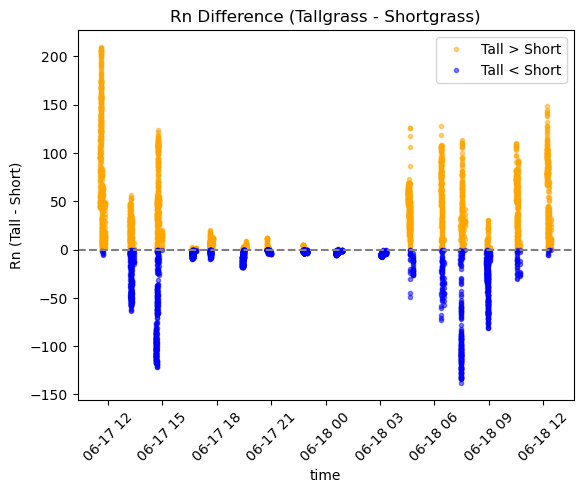

In [131]:
# Plotting the difference in one variable in the tall and short grass

# Plotting settings
variable = "Rn"
# End plotting settings

# # Sort both DataFrames by datetime
# shortgrass_mobrad = shortgrass_mobrad.sort_values('datetime')
# tallgrass_mobrad = tallgrass_mobrad.sort_values('datetime')

# # Perform asof merge with x-minute tolerance
# merged = pd.merge_asof(
#     shortgrass_mobrad[['datetime', variable]],
#     tallgrass_mobrad[['datetime', variable]],
#     on='datetime',
#     tolerance=pd.Timedelta('50min'),
#     direction='nearest',
#     suffixes=('_short', '_tall')
# )

# Make sure index is sorted
shortgrass_mobrad = shortgrass_mobrad.sort_index()
tallgrass_mobrad = tallgrass_mobrad.sort_index()

merged = pd.merge_asof(
    shortgrass_mobrad[[variable]],
    tallgrass_mobrad[[variable]],
    tolerance=pd.Timedelta('50min'),
    direction='nearest',
    suffixes=('_short', '_tall'),
    left_index=True,
    right_index=True
)


# Drop rows where no tallgrass match was found
merged = merged.dropna(subset=[f'{variable}_tall'])

# Calculate difference
merged[f'{variable}_diff'] = merged[f'{variable}_tall'] - merged[f'{variable}_short']

# Plot positive differences (orange)

pos = merged[merged[f'{variable}_diff'] > 0]
plt.plot(
    pos.index, pos[f'{variable}_diff'],
    linestyle='None', marker='o', alpha=0.5, markersize=3, color='orange', label='Tall > Short'
)

# Plot negative differences (blue)
neg = merged[merged[f'{variable}_diff'] < 0]
plt.plot(
    neg.index, neg[f'{variable}_diff'],
    linestyle='None', marker='o', alpha=0.5, markersize=3, color='blue', label='Tall < Short'
)

# Dashed horizontal line at 0
plt.axhline(0, color='gray', linestyle='--')

plt.xlabel('time')
plt.ylabel(f'{variable} (Tall - Short)')
plt.title(f'{variable} Difference (Tallgrass - Shortgrass)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# ### Next Fig.

# plt.figure(figsize=(12, 5))

# plt.plot(merged['datetime'], merged[f'{variable}_short'], label=f'Short Grass {variable}', color='green')
# plt.plot(merged['datetime'], merged[f'{variable}_tall'], label=f'Tall Grass {variable}', color='brown')

# plt.fill_between(merged['datetime'],
#                  merged[f'{variable}_short'],
#                  merged[f'{variable}_tall'],
#                  where=(merged[f'{variable}_short'] > merged[f'{variable}_tall']),
#                  color='green', alpha=0.3, interpolate=True, label='Short > Tall')

# plt.fill_between(merged['datetime'],
#                  merged[f'{variable}_short'],
#                  merged[f'{variable}_tall'],
#                  where=(merged[f'{variable}_short'] <= merged[f'{variable}_tall']),
#                  color='brown', alpha=0.3, interpolate=True, label='Tall ≥ Short')

# plt.xlabel('Time')
# plt.ylabel(f'{variable} (W/m²)')
# plt.title(f'{variable}: Short vs Tall Grass with Shaded Differences')
# plt.legend()
# plt.tight_layout()
# plt.show()


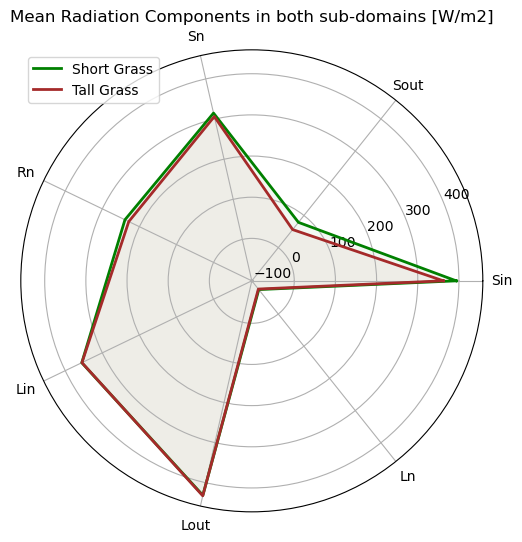

In [139]:
categories = ['Sin', 'Sout', 'Sn', 'Rn', 'Lin', 'Lout', 'Ln']

short_means = [shortgrass_mobrad[col].mean() for col in categories]
tall_means = [tallgrass_mobrad[col].mean() for col in categories]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
short_means += short_means[:1]  # wrap around for closed circle
tall_means += tall_means[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, short_means, label='Short Grass', color='green', linewidth=2)
ax.fill(angles, short_means, color='green', alpha=0.05)
ax.plot(angles, tall_means, label='Tall Grass', color='brown', linewidth=2)
ax.fill(angles, tall_means, color='brown', alpha=0.05)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Mean Radiation Components in both sub-domains [W/m2]')
ax.legend(loc='upper left')
plt.show()


In [147]:
shortgrass_mobrad

,Index,x,y,lat,lon,DOY,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22
datetime,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:33:40,1,0.000000,0.000000,51.981710,5.621690,168,1133,40,895.08,155.95,368.118463,480.379463,739.13,-112.261,626.869,0.174230,30.239358,0.000000,0.000000,-2.0,61.404196,177.688390,NaN
2025-06-17 11:33:41,2,0.242108,-0.362193,51.981707,5.621693,168,1133,41,895.08,156.01,368.013849,480.153849,739.07,-112.140,626.930,0.174297,30.203730,0.016667,0.435661,-2.0,61.404303,177.696380,NaN
2025-06-17 11:33:42,3,0.484216,-0.724386,51.981703,5.621697,168,1133,42,895.93,156.13,367.902463,479.988463,739.80,-112.086,627.714,0.174266,30.177604,0.033333,0.871321,-2.0,61.404410,177.704370,NaN
2025-06-17 11:33:43,4,0.726324,-1.086579,51.981700,5.621700,168,1133,43,896.55,156.18,367.978770,479.860770,740.37,-111.882,628.488,0.174201,30.157428,0.050000,1.306982,-2.0,61.404516,177.712360,NaN
2025-06-17 11:33:44,5,0.726324,-1.086579,51.981700,5.621700,168,1133,44,895.81,156.13,367.948003,479.800003,739.68,-111.852,627.828,0.174289,30.147826,0.066667,1.306982,-2.0,61.404618,177.720344,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 12:25:26,811,-0.617905,4.430245,51.981703,5.621777,169,1225,26,856.34,178.18,402.408135,492.036135,678.16,-89.628,588.532,0.208072,32.063321,13.500000,553.143230,3.0,60.069741,201.853279,NaN
2025-06-18 12:25:27,812,-1.088758,4.784186,51.981707,5.621770,169,1225,27,856.46,180.54,402.444135,492.788135,675.92,-90.344,585.576,0.210798,32.179872,13.516667,553.732278,3.0,60.068785,201.860682,NaN
2025-06-18 12:25:28,813,-1.559612,5.138127,51.981710,5.621763,169,1225,28,856.34,183.26,402.089078,493.448078,673.08,-91.359,581.721,0.214004,32.282046,13.533333,554.321325,3.0,60.067829,201.868085,NaN


In [151]:
# shortgrass_mobrad['hour'] = shortgrass_mobrad.index.dt.hour
# tallgrass_mobrad['hour'] = tallgrass_mobrad.index.dt.hour

hourly_means_short = shortgrass_mobrad.resample('H').mean()
hourly_means_tall = tallgrass_mobrad.resample('H').mean()


# short_hourly = shortgrass_mobrad.groupby('hour')['Rn'].mean()
# tall_hourly = tallgrass_mobrad.groupby('hour')['Rn'].mean()

hourly_df = pd.DataFrame({'Short Grass': hourly_means_short, 'Tall Grass': hourly_means_tall})

plt.figure(figsize=(10, 4))
sns.heatmap(hourly_df.T, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Net Radiation (W/m²)'})
plt.title('Hourly Mean Net Radiation for Short vs Tall Grass')
plt.xlabel('Hour of Day')
plt.show()


C:\Users\48512\AppData\Local\Temp\ipykernel_7360\1454168845.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_means_short = shortgrass_mobrad.resample('H').mean()
C:\Users\48512\AppData\Local\Temp\ipykernel_7360\1454168845.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_means_tall = tallgrass_mobrad.resample('H').mean()


ValueError: If using all scalar values, you must pass an index

In [ ]:
# Add hour column
shortgrass_mobrad['hour'] = shortgrass_mobrad['datetime'].dt.hour
tallgrass_mobrad['hour'] = tallgrass_mobrad['datetime'].dt.hour

# Variables you want to compare
variables = ['Sin', 'Sout', 'Sn', 'Lin', 'Lout', 'Ln', 'Rn']

# Compute hourly means for short grass
short_hourly = shortgrass_mobrad.groupby('hour')[variables].mean()
# Compute hourly means for tall grass
tall_hourly = tallgrass_mobrad.groupby('hour')[variables].mean()

# Build combined DataFrame
hourly_df = pd.concat(
    { 'Short Grass': short_hourly, 'Tall Grass': tall_hourly },
    names=['Grass Type', 'Hour']
).reset_index()

# Pivot for heatmap (one heatmap per variable)
for var in variables:
    heatmap_data = hourly_df.pivot(index='Grass Type', columns='Hour', values=var)
    
    plt.figure(figsize=(15, 8))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': f'{var} (W/m²)'})
    plt.title(f'Hourly Mean {var} for Short vs Tall Grass')
    plt.xlabel('Hour of Day')
    plt.ylabel('')
    plt.show()


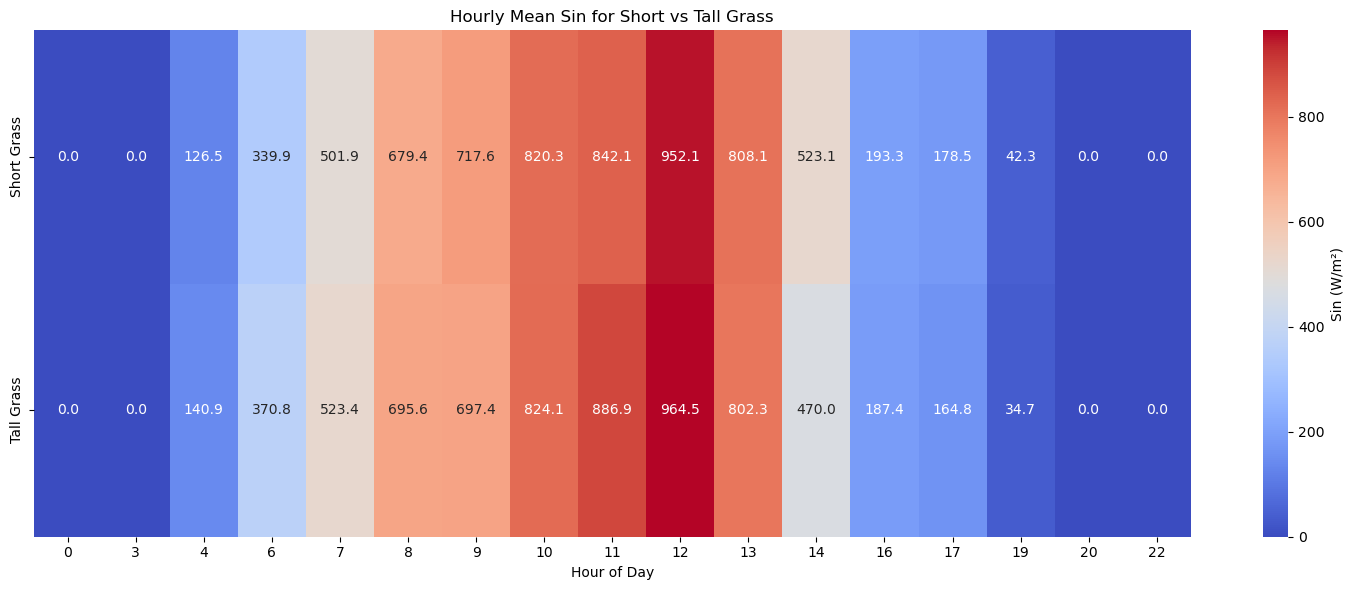

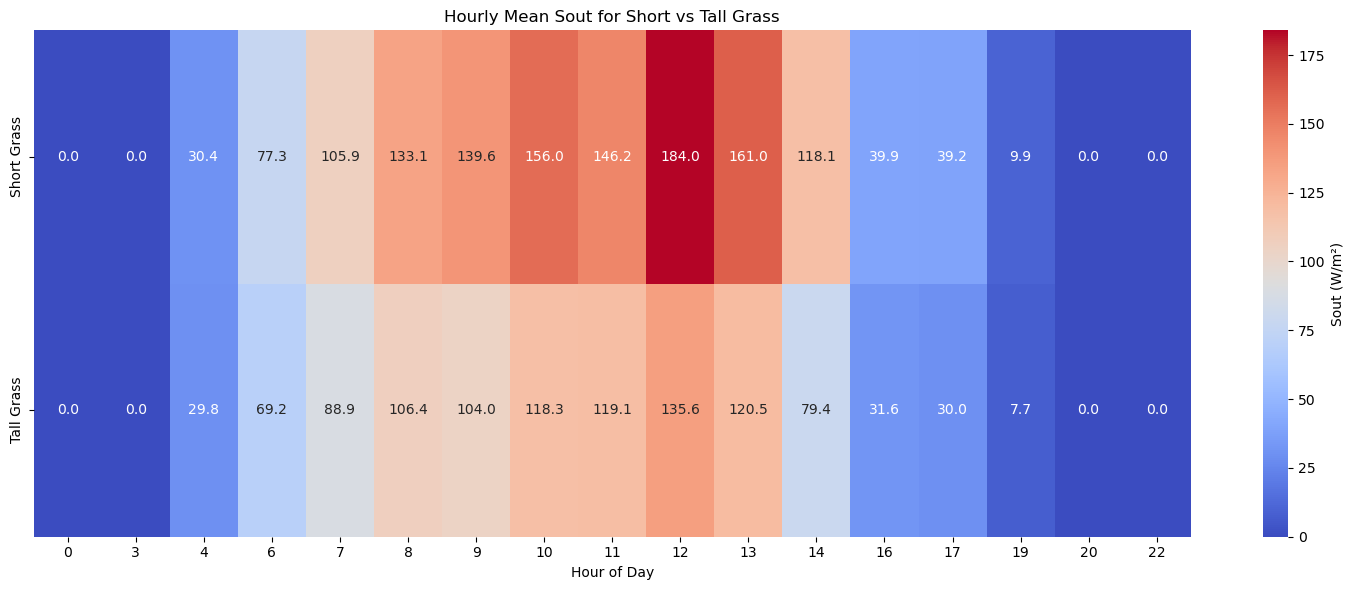

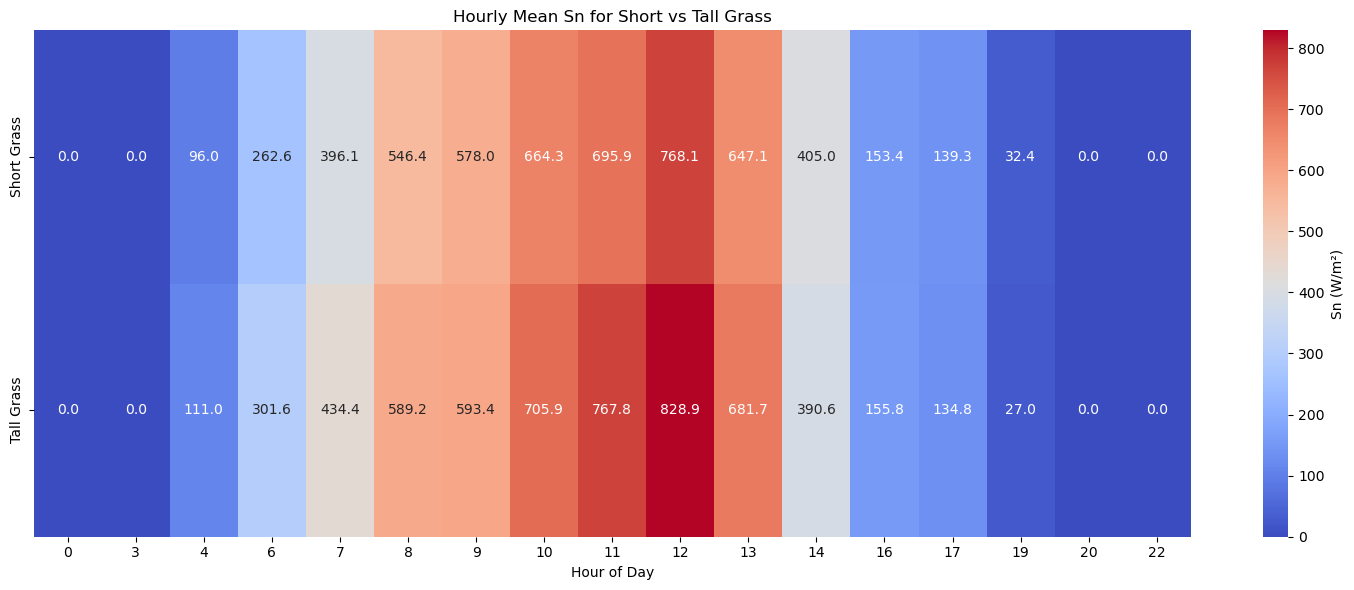

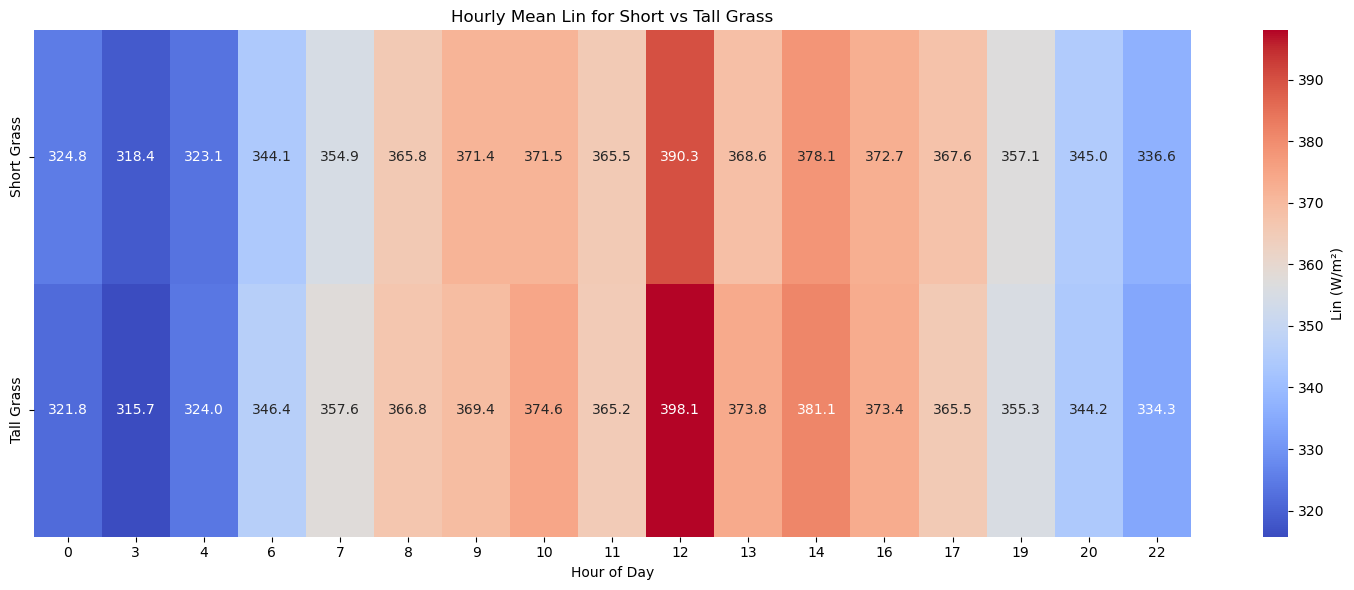

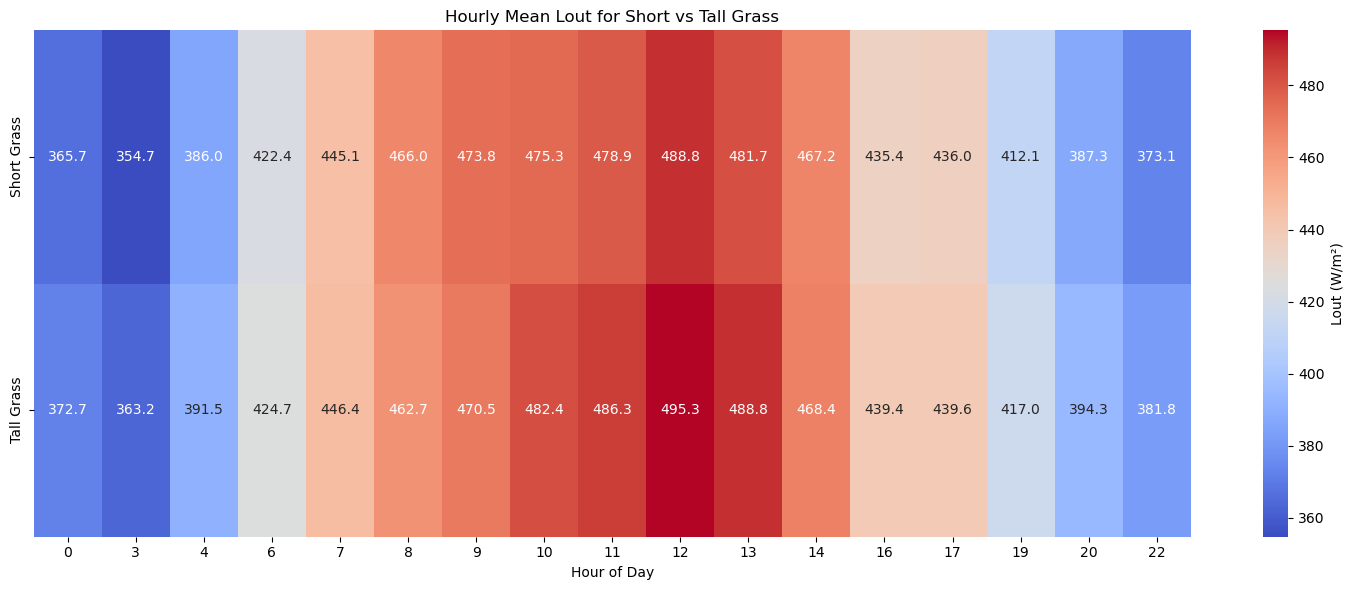

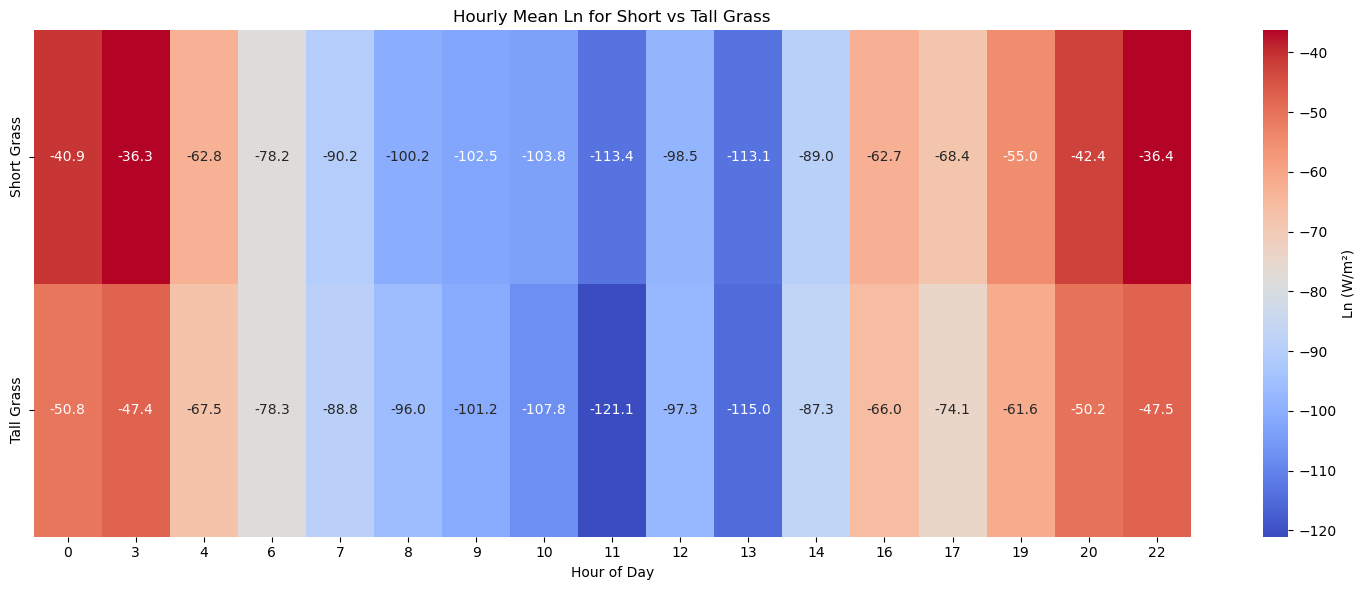

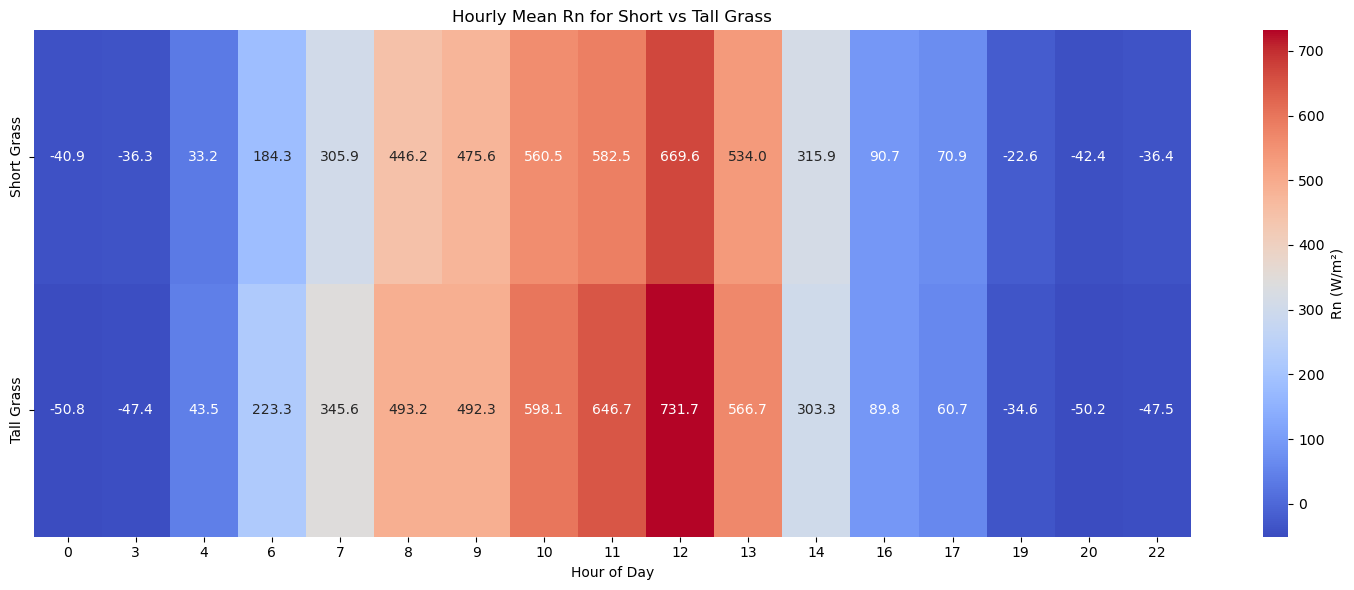

In [153]:
# Add 'hour' column using datetime index
shortgrass_mobrad['hour'] = shortgrass_mobrad.index.hour
tallgrass_mobrad['hour'] = tallgrass_mobrad.index.hour

# Variables to compare
variables = ['Sin', 'Sout', 'Sn', 'Lin', 'Lout', 'Ln', 'Rn']

# Compute hourly means
short_hourly = shortgrass_mobrad.groupby('hour')[variables].mean()
tall_hourly = tallgrass_mobrad.groupby('hour')[variables].mean()

# Combine for plotting
hourly_df = pd.concat(
    {'Short Grass': short_hourly, 'Tall Grass': tall_hourly},
    names=['Grass Type', 'Hour']
).reset_index()

# Plot heatmaps
for var in variables:
    heatmap_data = hourly_df.pivot(index='Grass Type', columns='Hour', values=var)
    
    plt.figure(figsize=(15, 6))
    sns.heatmap(
        heatmap_data,
        cmap='coolwarm', annot=True, fmt=".1f",
        cbar_kws={'label': f'{var} (W/m²)'}
    )
    plt.title(f'Hourly Mean {var} for Short vs Tall Grass')
    plt.xlabel('Hour of Day')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

C:\Users\48512\AppData\Local\Temp\ipykernel_7360\3154328537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grass', y='Rn', data=combined, palette=['blue', 'orange'])


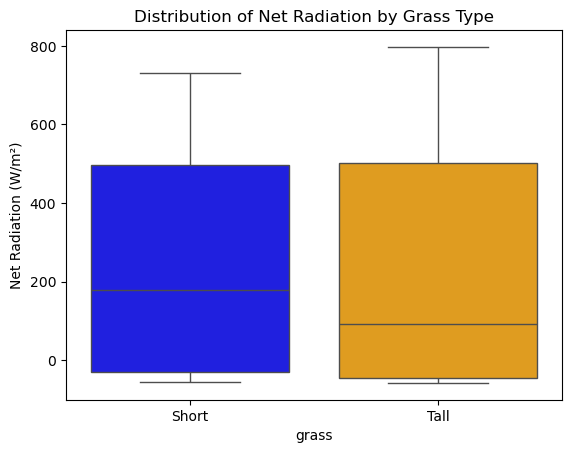

In [165]:
combined = pd.concat([
    shortgrass_mobrad.assign(grass='Short'),
    tallgrass_mobrad.assign(grass='Tall')
])
sns.boxplot(x='grass', y='Rn', data=combined, palette=['blue', 'orange'])
plt.title('Distribution of Net Radiation by Grass Type')
plt.ylabel('Net Radiation (W/m²)')
plt.show()


In [ ]:
###### END RADIATION BALANCE ######
# Still missing RB for 2 domains in Loobos, to do tomorrow

In [ ]:
###### ENERGY BALANCE ######

In [ ]:
### VK short grass EB closure ###

In [ ]:
EB_VK_shortgrass

In [ ]:
# Skipping rows of data where H, LE or G are NaN
EB_VK_shortgrass = EB_VK_shortgrass.dropna(subset=['G1(W/m2)', 'LE', 'H'])
EB_VK_tallgrass = EB_VK_tallgrass.dropna(subset=['G1(W/m2)', 'LE', 'H'])

In [ ]:
EB_VK_shortgrass['Q*'] = EB_VK_shortgrass['H'] + EB_VK_shortgrass['LE'] + EB_VK_shortgrass['G1(W/m2)'] # How much energy is comming/escaping the system

EB_VK_tallgrass['Q*'] = EB_VK_tallgrass['H'] + EB_VK_tallgrass['LE'] + EB_VK_tallgrass['G1(W/m2)'] # How much energy is comming/escaping the system


In [ ]:
energy_dif

In [ ]:
energy_dif
total = energy_dif.sum()
total

In [ ]:
# Is the Q* from energy balance the same as the Q from energy balance?
# Q*en = H + LvE + G = Rn
# Q*rad = s_down + l_down - s_up - l_up


energy_dif_short = EB_VK_shortgrass['Rn'] - EB_VK_shortgrass['Q*']
plt.plot(EB_VK_shortgrass.index, energy_dif_short, label="Short grass")

energy_dif_tall = EB_VK_tallgrass['Rn'] - EB_VK_tallgrass['Q*']
plt.plot(EB_VK_tallgrass.index, energy_dif_tall, label="Tall grass")
plt.title('Difference in Rn and Q* in both sub-domains [W/m2]')
plt.xticks(rotation=45) 
plt.legend()
plt.xlabel('time')
plt.ylabel('Rn - Q* [W/m2]')

In [ ]:
energy_dif = EB_VK_tallgrass['Rn'] - EB_VK_tallgrass['Q*']
plt.plot(energy_dif, EB_VK_tallgrass.index)
plt.title('Difference in Rn and Q* in tallgrass field [W/m2]')

In [ ]:
EB_VK_shortgrass

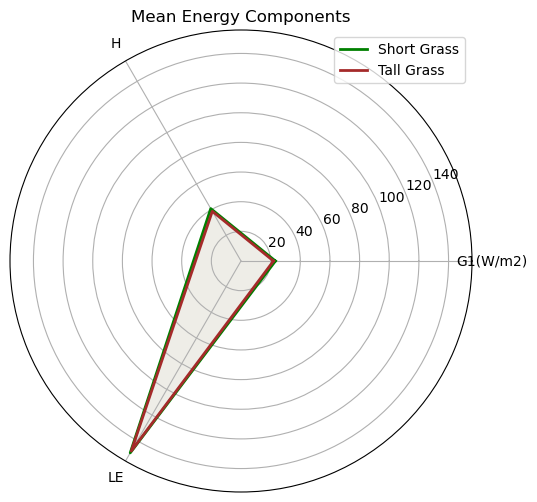

In [167]:
# plot to see how different energy balance are distributed
categories = ['G1(W/m2)', 'H', 'LE']

short_means = [EB_VK_shortgrass[col].mean() for col in categories]
tall_means = [EB_VK_tallgrass[col].mean() for col in categories]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
short_means += short_means[:1]  # wrap around for closed circle
tall_means += tall_means[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, short_means, label='Short Grass', color='green', linewidth=2)
ax.fill(angles, short_means, color='green', alpha=0.05)
ax.plot(angles, tall_means, label='Tall Grass', color='brown', linewidth=2)
ax.fill(angles, tall_means, color='brown', alpha=0.05)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Mean Energy Components')
ax.legend(loc='upper right')
plt.show()

In [169]:
# Summary, what I already have:
# 1. RB_VK_tallgrass
# 2. EB_VK_shortgrass
# 3. RB_VK_tallgrass
# 4. EB_VK_tallgrass

# What I need to have:
# 3. EB_LB_under/over canopy? Comparison of RB and EB of some other domains


In [ ]:
# Calculate correlation
# settings
df = EB_VK_tallgrass
var1 = 'Lin'
var2 = "Lout"
loc = 'shortgrass'
# end settings

correlation = df[var1].corr(df[var2])
print(f'Correlation of {var1} and {var2} in {loc} is {correlation}')

In [ ]:
EB_VK_shortgrass

In [ ]:
###### END ENERGY BALANCE ######

In [191]:
EB_VK_shortgrass

,Index,x,y,lat,lon,DOY_x,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22,TIMESTAMP_x,DOY_y,daytime,file_records,used_records,Tau,qc_Tau,H,qc_H,LE,qc_LE,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,H_strg,LE_strg,co2_strg,h2o_strg,co2_v-adv,h2o_v-adv,co2_molar_density,co2_mole_fraction,co2_mixing_ratio,co2_time_lag,co2_def_timelag,h2o_molar_density,h2o_mole_fraction,h2o_mixing_ratio,h2o_time_lag,h2o_def_timelag,sonic_temperature,air_temperature,air_pressure,air_density,air_heat_capacity,air_molar_volume,ET,water_vapor_density,e,es,specific_humidity,RH,VPD,Tdew,u_unrot,v_unrot,w_unrot,u_rot,v_rot,w_rot,wind_speed,max_wind_speed,wind_dir,yaw,pitch,roll,u*,TKE,L,(z-d)/L,bowen_ratio,T*,model,x_peak,x_offset,x_10%,x_30%,x_50%,x_70%,x_90%,un_Tau,Tau_scf,un_H,H_scf,un_LE,LE_scf,un_co2_flux,co2_scf,un_h2o_flux,h2o_scf,spikes_hf,amplitude_resolution_hf,drop_out_hf,absolute_limits_hf,skewness_kurtosis_hf,skewness_kurtosis_sf,discontinuities_hf,discontinuities_sf,timelag_hf,timelag_sf,attack_angle_hf,non_steady_wind_hf,u_spikes,v_spikes,w_spikes,ts_spikes,co2_spikes,h2o_spikes,chopper_LI-7500,detector_LI-7500,pll_LI-7500,sync_LI-7500,mean_value_AGC_LI-7500,u_var,v_var,w_var,ts_var,co2_var,h2o_var,w/ts_cov,w/co2_cov,w/h2o_cov,TIMESTAMP_y,G1(W/m2),G2(W/m2)
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:30:00,304.737523,-39.758223,-9.255327,51.981640,5.621107,168.0,1138.232902,29.763401,842.097689,146.180148,365.535223,478.933245,695.917542,-113.398022,582.519519,0.173910,30.008130,5.062292,154.541944,-1.293530,61.409287,180.113025,NaN,2025-06-17 11:30:00,168.4790,1,36000,35998,-0.059293,1,105.263000,0,288.69900,0.0,-9.819090,0.0,6.552260,0.0,1.183940,0.566578,-0.098863,0.012859,-2.145650e-10,-9.531270e-12,16.2595,397.710,404.862,0.1,1,722.270,17.6668,17.9845,0.1,1,298.028,296.365,101300.0,1.18293,1015.28,0.024460,0.424587,0.013015,1780.08,2836.17,0.011003,62.7635,1056.0900,288.831,1.451400,-2.243950,-0.104285,2.674460,-1.082080e-13,-1.319630e-14,2.674460,7.151810,253.127,302.8950,-2.23469,NaN,0.223884,1.366470,-9.39961,-0.357781,0.364611,-0.391478,0,43.5588,-6.61022,14.9523,37.2334,56.7833,79.6394,119.314,-0.058330,1.01652,119.824000,1.01775,249.14000,1.10064,-15.644800,1.10064,5.654450,1.10064,800000099,800000099,800000099,800000099,800000099,800000099,899999999,899999999,89999,89999,89,89,12,5,2,12,19,22,0,0,0,0,56,1.245340,1.343780,0.143821,0.402884,0.011466,1483.2200,0.099769,-0.015645,5.654450,2025-06-17T11:30:00.000000000,83.587706,91.821676
2025-06-17 13:00:00,255.296907,-53.049007,-12.172498,51.981608,5.620955,168.0,1314.777320,28.657732,808.077979,160.982227,368.598827,481.719019,647.095753,-113.120192,533.975561,0.199602,30.448546,4.238282,141.822567,-4.750515,55.948633,222.171667,NaN,2025-06-17 13:00:00,168.5415,1,36000,35998,-0.043897,1,120.450000,0,313.09100,0.0,-8.469500,0.0,7.112250,0.0,0.793672,0.678197,-0.043253,0.015406,-1.902210e-10,-8.572850e-12,16.1844,397.139,404.376,0.1,1,729.398,17.8982,18.2244,0.1,1,298.981,297.291,101300.0,1.17914,1015.43,0.024538,0.460874,0.013144,1803.26,2998.69,0.011147,60.1350,1195.4300,289.033,1.766360,-2.158750,-0.092601,2.790850,5.100640e-14,-1.175330e-14,2.790850,7.495230,244.959,309.2910,-1.90144,NaN,0.192946,1.551970,-5.25827,-0.639565,0.384713,-0.521380,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.043203,1.01608,136.210000,1.01761,269.32900,1.10145,-15.211800,1.10145,6.118130,1.10145,800000099,800000099,800000099,800000099,800000099,800000099,899999999,899999999,89999,89999,89,89,0,3,1,11,14,12,0,0,0,0,56,1.359750,1.594290,0.149887,0.443982,0.009770,1461.5900,0.113761,-0.015212,6.118130,2025-06-17T13:00:00.000000000,60.317521,66.488771
2025-06-17 14:30:00,330.805825,-45.791497,-8.552650,51.981621,5.621063,168.0,1442.757282,29.368932,523.101117,118.148092,378.126058,467.156927,404.953024,-89.030869,315.922155,0.223538,28.124497,5.49676

In [ ]:
# Did any specific gropu contributed to the strange results of sw_in_tall not equal to sw_in_short?


In [271]:
shortgrass_mobrad

,Index,x,y,lat,lon,DOY,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22
datetime,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:33:40,1,0.000000,0.000000,51.981710,5.621690,168,1133,40,895.08,155.95,368.118463,480.379463,739.13,-112.261,626.869,0.174230,30.239358,0.000000,0.000000,-2.0,61.404196,177.688390,NaN
2025-06-17 11:33:41,2,0.242108,-0.362193,51.981707,5.621693,168,1133,41,895.08,156.01,368.013849,480.153849,739.07,-112.140,626.930,0.174297,30.203730,0.016667,0.435661,-2.0,61.404303,177.696380,NaN
2025-06-17 11:33:42,3,0.484216,-0.724386,51.981703,5.621697,168,1133,42,895.93,156.13,367.902463,479.988463,739.80,-112.086,627.714,0.174266,30.177604,0.033333,0.871321,-2.0,61.404410,177.704370,NaN
2025-06-17 11:33:43,4,0.726324,-1.086579,51.981700,5.621700,168,1133,43,896.55,156.18,367.978770,479.860770,740.37,-111.882,628.488,0.174201,30.157428,0.050000,1.306982,-2.0,61.404516,177.712360,NaN
2025-06-17 11:33:44,5,0.726324,-1.086579,51.981700,5.621700,168,1133,44,895.81,156.13,367.948003,479.800003,739.68,-111.852,627.828,0.174289,30.147826,0.066667,1.306982,-2.0,61.404618,177.720344,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 12:25:26,811,-0.617905,4.430245,51.981703,5.621777,169,1225,26,856.34,178.18,402.408135,492.036135,678.16,-89.628,588.532,0.208072,32.063321,13.500000,553.143230,3.0,60.069741,201.853279,NaN
2025-06-18 12:25:27,812,-1.088758,4.784186,51.981707,5.621770,169,1225,27,856.46,180.54,402.444135,492.788135,675.92,-90.344,585.576,0.210798,32.179872,13.516667,553.732278,3.0,60.068785,201.860682,NaN
2025-06-18 12:25:28,813,-1.559612,5.138127,51.981710,5.621763,169,1225,28,856.34,183.26,402.089078,493.448078,673.08,-91.359,581.721,0.214004,32.282046,13.533333,554.321325,3.0,60.067829,201.868085,NaN


In [213]:
tallgrass_mobrad

,Index,x,y,lat,lon,DOY,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22,hour
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:42:02,503,14.202983,-6.171390,51.981650,5.621893,168,1142,2,923.45,137.51,365.629541,480.019541,785.94,-114.390,671.550,0.148909,30.182514,8.366667,261.913529,-0.2,61.411286,181.699091,NaN,11
2025-06-17 11:42:03,504,14.660474,-6.154886,51.981650,5.621900,168,1142,3,926.26,139.17,365.773541,481.192541,787.09,-115.419,671.671,0.150249,30.367654,8.383333,262.371317,-0.0,61.411210,181.707090,NaN,11
2025-06-17 11:42:04,505,15.105422,-5.766491,51.981653,5.621907,168,1142,4,924.55,139.84,365.588125,482.305125,784.71,-116.717,667.993,0.151252,30.542946,8.400000,262.961935,-0.4,61.411131,181.715090,NaN,11
2025-06-17 11:42:05,506,15.550370,-5.378096,51.981657,5.621913,168,1142,5,925.77,140.23,365.737541,483.176541,785.54,-117.439,668.101,0.151474,30.680029,8.416667,263.552552,-0.8,61.411050,181.723089,NaN,11
2025-06-17 11:42:06,507,15.995318,-4.989702,51.981660,5.621920,168,1142,6,923.33,139.74,365.670958,483.776958,783.59,-118.106,665.484,0.151344,30.774373,8.433333,264.143170,-1.2,61.410970,181.731088,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 12:25:07,792,10.192256,-2.976311,51.981633,5.621930,169,1225,7,870.87,155.27,400.378933,487.905933,715.60,-87.527,628.073,0.178293,31.420797,13.183333,538.091673,3.0,60.087853,201.712601,NaN,12
2025-06-18 12:25:08,793,9.505147,-3.001100,51.981633,5.621920,169,1225,8,870.26,158.68,400.489589,488.018589,711.58,-87.529,624.051,0.182336,31.438377,13.200000,538.779229,3.0,60.086906,201.720007,NaN,12
2025-06-18 12:25:09,794,8.818038,-3.025888,51.981633,5.621910,169,1225,9,869.89,163.32,400.930465,488.617465,706.57,-87.687,618.883,0.187748,31.531778,13.216667,539.466785,3.0,60.085959,201.727413,NaN,12


In [281]:
tallgrass_mobrad

,Index,x,y,lat,lon,DOY,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22
datetime,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:42:02,503,14.202983,-6.171390,51.981650,5.621893,168,1142,2,923.45,137.51,365.629541,480.019541,785.94,-114.390,671.550,0.148909,30.182514,8.366667,261.913529,-0.2,61.411286,181.699091,NaN
2025-06-17 11:42:03,504,14.660474,-6.154886,51.981650,5.621900,168,1142,3,926.26,139.17,365.773541,481.192541,787.09,-115.419,671.671,0.150249,30.367654,8.383333,262.371317,-0.0,61.411210,181.707090,NaN
2025-06-17 11:42:04,505,15.105422,-5.766491,51.981653,5.621907,168,1142,4,924.55,139.84,365.588125,482.305125,784.71,-116.717,667.993,0.151252,30.542946,8.400000,262.961935,-0.4,61.411131,181.715090,NaN
2025-06-17 11:42:05,506,15.550370,-5.378096,51.981657,5.621913,168,1142,5,925.77,140.23,365.737541,483.176541,785.54,-117.439,668.101,0.151474,30.680029,8.416667,263.552552,-0.8,61.411050,181.723089,NaN
2025-06-17 11:42:06,507,15.995318,-4.989702,51.981660,5.621920,168,1142,6,923.33,139.74,365.670958,483.776958,783.59,-118.106,665.484,0.151344,30.774373,8.433333,264.143170,-1.2,61.410970,181.731088,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 12:25:07,792,10.192256,-2.976311,51.981633,5.621930,169,1225,7,870.87,155.27,400.378933,487.905933,715.60,-87.527,628.073,0.178293,31.420797,13.183333,538.091673,3.0,60.087853,201.712601,NaN
2025-06-18 12:25:08,793,9.505147,-3.001100,51.981633,5.621920,169,1225,8,870.26,158.68,400.489589,488.018589,711.58,-87.529,624.051,0.182336,31.438377,13.200000,538.779229,3.0,60.086906,201.720007,NaN
2025-06-18 12:25:09,794,8.818038,-3.025888,51.981633,5.621910,169,1225,9,869.89,163.32,400.930465,488.617465,706.57,-87.687,618.883,0.187748,31.531778,13.216667,539.466785,3.0,60.085959,201.727413,NaN


In [283]:
shortgrass_mobrad

,Index,x,y,lat,lon,DOY,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22
datetime,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:33:40,1,0.000000,0.000000,51.981710,5.621690,168,1133,40,895.08,155.95,368.118463,480.379463,739.13,-112.261,626.869,0.174230,30.239358,0.000000,0.000000,-2.0,61.404196,177.688390,NaN
2025-06-17 11:33:41,2,0.242108,-0.362193,51.981707,5.621693,168,1133,41,895.08,156.01,368.013849,480.153849,739.07,-112.140,626.930,0.174297,30.203730,0.016667,0.435661,-2.0,61.404303,177.696380,NaN
2025-06-17 11:33:42,3,0.484216,-0.724386,51.981703,5.621697,168,1133,42,895.93,156.13,367.902463,479.988463,739.80,-112.086,627.714,0.174266,30.177604,0.033333,0.871321,-2.0,61.404410,177.704370,NaN
2025-06-17 11:33:43,4,0.726324,-1.086579,51.981700,5.621700,168,1133,43,896.55,156.18,367.978770,479.860770,740.37,-111.882,628.488,0.174201,30.157428,0.050000,1.306982,-2.0,61.404516,177.712360,NaN
2025-06-17 11:33:44,5,0.726324,-1.086579,51.981700,5.621700,168,1133,44,895.81,156.13,367.948003,479.800003,739.68,-111.852,627.828,0.174289,30.147826,0.066667,1.306982,-2.0,61.404618,177.720344,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 12:25:26,811,-0.617905,4.430245,51.981703,5.621777,169,1225,26,856.34,178.18,402.408135,492.036135,678.16,-89.628,588.532,0.208072,32.063321,13.500000,553.143230,3.0,60.069741,201.853279,NaN
2025-06-18 12:25:27,812,-1.088758,4.784186,51.981707,5.621770,169,1225,27,856.46,180.54,402.444135,492.788135,675.92,-90.344,585.576,0.210798,32.179872,13.516667,553.732278,3.0,60.068785,201.860682,NaN
2025-06-18 12:25:28,813,-1.559612,5.138127,51.981710,5.621763,169,1225,28,856.34,183.26,402.089078,493.448078,673.08,-91.359,581.721,0.214004,32.282046,13.533333,554.321325,3.0,60.067829,201.868085,NaN


In [279]:
# Align df2 to df1 by nearest datetime within a 10-minute tolerance
df2_aligned = shortgrass_mobrad.reindex(t.index, method='nearest', tolerance=pd.Timedelta(minutes=5))

# Subtract (matching columns will be subtracted; rest will be NaNs)
#df_diff = df1 - df2_aligned

In [289]:
shortgrass_mobrad['Sin']

datetime
2025-06-17 11:33:40    895.08
2025-06-17 11:33:41    895.08
2025-06-17 11:33:42    895.93
2025-06-17 11:33:43    896.55
2025-06-17 11:33:44    895.81
                        ...  
2025-06-18 12:25:26    856.34
2025-06-18 12:25:27    856.46
2025-06-18 12:25:28    856.34
2025-06-18 12:25:29    854.76
2025-06-18 12:25:30    855.98
Name: Sin, Length: 6677, dtype: float64

In [291]:
df2_aligned['Sin']

datetime
2025-06-17 11:33:40       NaN
2025-06-17 11:33:41       NaN
2025-06-17 11:33:42       NaN
2025-06-17 11:33:43       NaN
2025-06-17 11:33:44       NaN
                        ...  
2025-06-18 12:25:26    868.06
2025-06-18 12:25:27    868.06
2025-06-18 12:25:28    868.06
2025-06-18 12:25:29    868.06
2025-06-18 12:25:30    868.06
Name: Sin, Length: 6677, dtype: float64

In [295]:
SW_diff = shortgrass_mobrad['Sin'] - df2_aligned['Sin']
SW_diff.dropna()
SW_diff

datetime
2025-06-17 11:33:40      NaN
2025-06-17 11:33:41      NaN
2025-06-17 11:33:42      NaN
2025-06-17 11:33:43      NaN
2025-06-17 11:33:44      NaN
                       ...  
2025-06-18 12:25:26   -11.72
2025-06-18 12:25:27   -11.60
2025-06-18 12:25:28   -11.72
2025-06-18 12:25:29   -13.30
2025-06-18 12:25:30   -12.08
Name: Sin, Length: 6677, dtype: float64

In [275]:
df2_aligned

,Index,x,y,lat,lon,DOY,HHMM,SS,Sin,Sout,Lin,Lout,Sn,Ln,Rn,albedo,Ts,TrackTime,TrackDist,TerrainASL,SolarEl,SolarAz,Unnamed: 22
datetime,,,,,,,,,,,,,,,,,,,,,,,
2025-06-17 11:33:40,503,14.202983,-6.171390,51.981650,5.621893,168,1142,2,923.45,137.51,365.629541,480.019541,785.94,-114.390,671.550,0.148909,30.182514,8.366667,261.913529,-0.2,61.411286,181.699091,NaN
2025-06-17 11:33:41,503,14.202983,-6.171390,51.981650,5.621893,168,1142,2,923.45,137.51,365.629541,480.019541,785.94,-114.390,671.550,0.148909,30.182514,8.366667,261.913529,-0.2,61.411286,181.699091,NaN
2025-06-17 11:33:42,503,14.202983,-6.171390,51.981650,5.621893,168,1142,2,923.45,137.51,365.629541,480.019541,785.94,-114.390,671.550,0.148909,30.182514,8.366667,261.913529,-0.2,61.411286,181.699091,NaN
2025-06-17 11:33:43,503,14.202983,-6.171390,51.981650,5.621893,168,1142,2,923.45,137.51,365.629541,480.019541,785.94,-114.390,671.550,0.148909,30.182514,8.366667,261.913529,-0.2,61.411286,181.699091,NaN
2025-06-17 11:33:44,503,14.202983,-6.171390,51.981650,5.621893,168,1142,2,923.45,137.51,365.629541,480.019541,785.94,-114.390,671.550,0.148909,30.182514,8.366667,261.913529,-0.2,61.411286,181.699091,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 12:25:26,796,7.444693,-3.075433,51.981633,5.621890,169,1225,11,868.06,171.59,400.961526,488.919526,696.47,-87.958,608.512,0.197671,31.578856,13.250000,540.841024,3.0,60.084065,201.742224,NaN
2025-06-18 12:25:27,796,7.444693,-3.075433,51.981633,5.621890,169,1225,11,868.06,171.59,400.961526,488.919526,696.47,-87.958,608.512,0.197671,31.578856,13.250000,540.841024,3.0,60.084065,201.742224,NaN
2025-06-18 12:25:28,796,7.444693,-3.075433,51.981633,5.621890,169,1225,11,868.06,171.59,400.961526,488.919526,696.47,-87.958,608.512,0.197671,31.578856,13.250000,540.841024,3.0,60.084065,201.742224,NaN
